# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">1. Business Understanding</p>

<h5>Masalah utama pada Serpong Garden Apartment adalah strategi promosi yang tidak terpersonalisasi, menyebabkan rendahnya konversi pembelian. Selain itu, data pelanggan tidak dimanfaatkan secara maksimal. Solusi yang diusulkan adalah penerapan machine learning untuk memprediksi tujuan pembelian pelanggan (tempat tinggal atau investasi) menggunakan algoritma seperti Naive Bayes, Decision Tree, dan Random Forest. Ini akan memungkinkan tim pemasaran untuk memberikan promosi yang lebih personal dan tepat sasaran, serta mengurangi pemborosan anggaran promosi.</h5>
<h5>Tujuan Sistem</h5>
<li>Menyediakan promosi yang lebih personal dan relevan.</li>
<li>Memanfaatkan data pelanggan untuk prediksi tujuan pembelian.</li>
<li>Mengurangi pemborosan anggaran promosi.</li>

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">2. Data Understanding</p>

In [3]:
# Import library untuk manipulasi data
import pandas as pd  # Untuk pengolahan data tabular
import numpy as np   # Untuk komputasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data statistik
from skimpy import skim # Import library skimpy untuk mendapatkan ringkasan statistik data yang lebih detail dan mudah dibaca
from summarytools import dfSummary # Import library summarytools untuk membuat ringkasan data yang komprehensif termasuk statistik, distribusi, dan missing values

# Import library untuk preprocessing data
from sklearn.model_selection import train_test_split  # Untuk membagi data train dan test
from sklearn.preprocessing import LabelEncoder  # Untuk encoding label kategorikal
from imblearn.over_sampling import SMOTE  # Untuk menangani data tidak seimbang

# Import library untuk model machine learning
from sklearn.tree import DecisionTreeClassifier  # Model pohon keputusan
from sklearn.ensemble import RandomForestClassifier  # Model random forest
from sklearn.naive_bayes import GaussianNB  # Model naive bayes

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Metrik evaluasi
from sklearn.metrics import roc_curve, auc  # Untuk kurva ROC dan nilai AUC

from sklearn.model_selection import GridSearchCV


# # --- 1. Feature Engineering ---
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengatur matplotlib untuk menampilkan plot di notebook
%matplotlib inline

In [4]:
# Memuat dataset
df = pd.read_csv('data_apartment.csv')  

In [5]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,No[int64],Mean (sd) : 1093.5 (631.2)min < med < max:1.0 < 1093.5 < 2186.0IQR (CV) : 1092.5 (1.7),"2,186 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACIklEQVR4nO3Xva/SUBzG8d+BKzm82IYXYWNxdGvCwuLm6B/r6g6JM4OLEwshIaWEeokN1kXd5NJW7X3S72eF0+c0+YYEl+e5Ac9dq+4LAPd4eOoLzrmumXVKPv9bnuePJc82crvibt3bLTP7XvLszXvfDNU51x2Px++DIBiWWT4ej2fn3Eczu5Q47kej0bswDPsN2q60W+f29Xp9kabp68Fg8KXVamVFz59Op9g59+FPsT71i9oJgmC4XC4fwzAs9OK73e7ler1+O5/PJ+12u3AsWZZ5M3uzWCw+TSaTUxO2q+zWvb3dboebzeZVFEWfZ7NZXORskiR+tVoND4dDx8xKhWpmZmEYXqbT6dci43Ecd733vSiKLkUvbvb7xXve+6wp21V2n8O2mVm/3y/cyk/dWx/eFWoVZS/+68WbtP03duve/lf41w8JhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJD/d8KUkSX/TB5/PZm5mlaer3+33vf55X3Va9d9Xz9/T1A8HOMdycLAetAAAAAElFTkSuQmCC"">",0(0.0%)
2,Project[object],1. Serpong Garden Apartment,"2,186 (100.0%)",,0(0.0%)
3,Year[int64],1. 20172. 20163. 20234. 20225. 20246. 20187. 20218. 20199. 202010. 2025,"1,263 (57.8%)300 (13.7%)182 (8.3%)137 (6.3%)90 (4.1%)80 (3.7%)46 (2.1%)42 (1.9%)36 (1.6%)10 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADx0lEQVR4nO3dQWobWQBF0S8jQmciYQRejBaRxfYitBtjrEEcMlEGcZrujhwkWXULrHNmmRXh5jtV/JcsDofDgMLd3A/A7RAbGbGRERsZsZERGxmxkREbGbGRWYwxPo8xPs39IDfg++FweJn7Iea03Gw2X1ar1f3cD/LR7ff7p8Vi8fctB7dcrVb32+32Zb1ef5v7YT6q5+fnv3a73f3j4+OnMcbtxjbGGOv1+tvDw8PXuR/mg/s89wPMzQsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmeUYP6/AzP0gH5nf35+W+/3+abfb3Q9XYCa13++fxhjf536OObkW3rn5a+EL/4oRlalOtpv/U8zvJhm8GHdwzNUHL8YdvGWqwYs3W37joy4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZqw9ejDt4yySDF+MOjnEtnIzBC5lLTzYnF2e7aPBi0MIlzh68GLRwqUsHLwYtnM1HXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3P2usp6iktdtK6ynuISNghkrKvInHOyOc14l5PXVRZVvNdJ6yqLKq7hnHWVRRXv4qMuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmZMGL0YuXMPJgxcjF97LtXAyBi9k/nSyOcm4qjcHLwYuXNvRwYuBC1P40+DFwIWr8lGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzNHBi4ELU3hz8GLgwrW5Fk7G4IWMFwQyfoySsa4iY11FxrqKjBcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryLgWTsa6isz/TzanGZP5z+DFyIUp3f0avGy325fX6E757yDhbP8MXl5/beTCZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3N08AJT+PfgxciFSbkWTsbghYwXBDJ+jJKxriJjXUXGuoqMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIuBZOxrqKjJONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsj8OtmGE42pLTebzZcxxjB0YWp3q9Xq3tCFgu9sZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZm+bqoGsOqionZIJCxriLj72xkxEZGbGTERkZsZMRGRmxkfgBpudRp6w7K3wAAAABJRU5ErkJggg=="">",0(0.0%)
4,Month[object],1. 01/01/20172. 12/01/20163. 03/01/20174. 04/01/20175. 05/01/20176. 02/01/20177. 08/01/20178. 07/01/20179. 06/01/201710. 06/01/202311. other,620 (28.4%)295 (13.5%)223 (10.2%)116 (5.3%)81 (3.7%)64 (2.9%)38 (1.7%)36 (1.6%)33 (1.5%)30 (1.4%)650 (29.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEiklEQVR4nO3dQW4TWQBF0Z/IosnEloWUZbAAL6IX24vwAthHFMUDkmaSHkAjGpJgk6pbMn3OjNkfXJVVpf/IxePj44DC5dIH4P9DbGTERkZsZMRGRmxkxEZGbGTERuZijHE1xniz9EFO8Onx8fF+6UNwutW7d+/+XK/X26UPcqzD4XB7cXHxl+DOz2q9Xm93u939ZrN5WPowP3N3d/d2v99vb25u3owxxHZmVmOMsdlsHq6vrz8ufZgjXS19AH6NFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzGuPzPbGlD3KMczknT1sdDofb/X6/HWdyT+xwONyOMT4tfQ5OZ4NA5sJ/mUVlriebpw8/mGVdZQHFUyZfV1lA8Zy51lVn8WZLy0ddMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MpMPXoxSeM4sgxejFJ7iWjgZgxcyUzzZPMU4yqsHL8YtHOtVgxfjFk4xxeDFuIWj+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5lWDF+MWTvHqwYtxC8dyL

In [ ]:
# Menampilkan semua baris
skim(df)

In [ ]:
# Menampilkan semua baris
df

In [ ]:
# Melihat dimensi data
print("Dimensi data:", df.shape)

In [ ]:
# Menampilkan beberapa baris pertama data
print("Baris pertama data:")
df.head()


In [ ]:
# Menampilkan beberapa baris terakhir data
print("Baris terakhir data:")
df.tail()

In [ ]:
# Mengecek tipe data dari setiap kolom
print("Tipe data setiap kolom:")
df.dtypes

In [ ]:
# Menghitung statistik deskriptif untuk kolom numerik
print("Statistik deskriptif untuk kolom numerik:")
df.describe()

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">3. Data Preparation</p>

In [6]:
# Mengecek nilai yang hilang (missing values) di setiap kolom
print("Nilai yang hilang di setiap kolom:")
df.isnull().sum()

Nilai yang hilang di setiap kolom:


No                  0
Project             0
Year                0
Month               0
Booking Status      0
                   ..
Disc                0
Add Disc            0
Booking Disc        0
Adjustment Price    0
Net Price           0
Length: 68, dtype: int64

In [ ]:
# # Langkah 1: Menangani Missing Values
# # Mengisi nilai yang hilang dengan mean untuk kolom numerik dan mode untuk kolom kategorikal
# for column in df.select_dtypes(include=[np.number]).columns:
#     df[column].fillna(df[column].mean(), inplace=True)

# for column in df.select_dtypes(include=[object]).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
# Langkah 2.1: Feature Selection yaitu Menghapus kolom tertentu
drop_column = ['No', 'Project', 'Category', 'Detail', 'Facing', 'Cancel Type', 'Deal Closer Team', 'Akad KPA/R Date', 'PostCode (ID)', 'Address (Cor)', 'PostCode (Cor)', 'Customer Job Status', 'Customer Education', 'Customer Income', 'Customer Salary Method', 'Customer Nation']
df = df.drop(columns=drop_column)

In [8]:
# Langkah 2.2: Feature Selection yaitu Menghapus kolom tertentu
drop_column1 = ['Book Date', 'Month', 'Country', 'Province', 'City', 'Unique ID', 'Block/Floor', 'Akad Month', 'PS Code', 'Net Area', 'Disc', 'Add Disc', 'Booking Disc', 'Adjustment Price', 'Status Checklist Document', 'Country (Cor)']
df = df.drop(columns=drop_column1)


In [9]:
# Langkah 2.3: Feature Selection yaitu Menghapus kolom tertentu
drop_column2 = ['Deal Closer', 'Sales Referral', 'Booking Term', 'Booking Term Price Scheme', 'Unit Name', 'Term Payment', 'Semi Gross Area', 'Area']
df = df.drop(columns=drop_column2)

In [ ]:
dfSummary(df)

In [ ]:
# Visualisasi bar chart untuk kolom dengan jumlah unique value yang tidak terlalu banyak (misal <= 10)
max_unique = 10  # batas maksimal unique value agar bar chart tetap informatif

for column in df.columns:
    if df[column].nunique() <= max_unique:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df, hue=column, palette="colorblind", legend=False)
        plt.title(f'Distribusi {column}')
        plt.xlabel(column)
        plt.ylabel('Jumlah')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
# Membuat bar chart dengan perbandingan terhadap tujuan pembelian
max_unique = 10

def plot_stacked_bar_chart(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Sales Purpose', data=data)
    plt.title(f'Distribusi {column} berdasarkan Tujuan Pembelian')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.legend(title='Sales Purpose', loc='upper right')
    plt.tight_layout()
    plt.show()

# Membuat bar chart bertumpuk untuk setiap atribut (kecuali 'Sales Purpose')
for column in df.columns:
    if column != 'Sales Purpose' and df[column].nunique() <= max_unique:
        plot_stacked_bar_chart(df, column)

In [10]:
# Menghitung usia berdasarkan Customer Birth Date
from datetime import datetime

# Convert 'Customer Birth Date' to datetime
df['Customer Birth Date'] = pd.to_datetime(df['Customer Birth Date'], errors='coerce')
df['Age'] = df['Customer Birth Date'].apply(lambda x: (datetime.now() - x).days // 365 if pd.notnull(x) else None)

In [ ]:
# Histogram untuk Distribusi Usia Pelanggan

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan', fontsize=16)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()


In [ ]:
# # Visualisasi heatmap korelasi antar fitur numerik
# plt.figure(figsize=(16, 10))
# corr = df.corr()
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
# plt.show()


In [ ]:
# Menampilkan distribusi beberapa fitur kunci
fitur_kunci = ['Cluster', 'Customer Grade', 'Sales Event', 'Year']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, fitur in enumerate(fitur_kunci):
    sns.countplot(x=fitur, hue='Sales Purpose', data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribusi {fitur}')
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan pie chart untuk kolom Sales Purpose
explode = (0.2, 0)
plt.figure(figsize=(8, 6))
df['Sales Purpose'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#007BFF', '#FFA500'], shadow=True, explode=(0.1, 0))
plt.title('Distribusi Sales Purpose')
plt.ylabel('')
plt.show()

In [46]:
# # Pilih fitur yang relevan
# categorical_features = ['Sales Event', 'Cluster', 'Zoning', 'View', 'Status KPR', 
#                         'Customer Type', 'Customer Sex', 'Customer Marital', 'Customer Grade']
# numerical_features = ['Age', 'Year']

# # Drop baris dengan nilai NaN pada fitur penting
# df = df.dropna(subset=numerical_features + categorical_features + ['Sales Purpose'])

In [12]:
# Melakukan encoding pada variabel kategorikal khusus pada kolom Customer Type, Customer Sex, Customer Grade, Sales Purpose

kolom_kategorikal = ['Booking Status', 'Sales Event', 'Cluster', 'Zoning', 'View', 'Customer Type', 'Customer Marital', 'Customer Sex', 'Customer Grade', 'Sales Purpose', 'Status KPR']
label_encoder = LabelEncoder()
for kolom in kolom_kategorikal:
    if kolom in df.columns:
        df[kolom] = label_encoder.fit_transform(df[kolom])


In [13]:
# Mengganti nama kolom menggunakan fungsi pandas .rename()
df = df.rename(columns={'City (Cor)': 'City', 'Address (ID)': 'Address', 'Province (Cor)': 'Province'})

In [14]:
# Memindahkan kolom 'Age' agar berada di samping kolom 'Customer Birth Date'
kolom = list(df.columns)
if 'Age' in kolom and 'Customer Birth Date' in kolom:
    kolom.remove('Age')
    idx = kolom.index('Customer Birth Date') + 1
    kolom.insert(idx, 'Age')
    df = df[kolom]


In [ ]:
dfSummary(df)

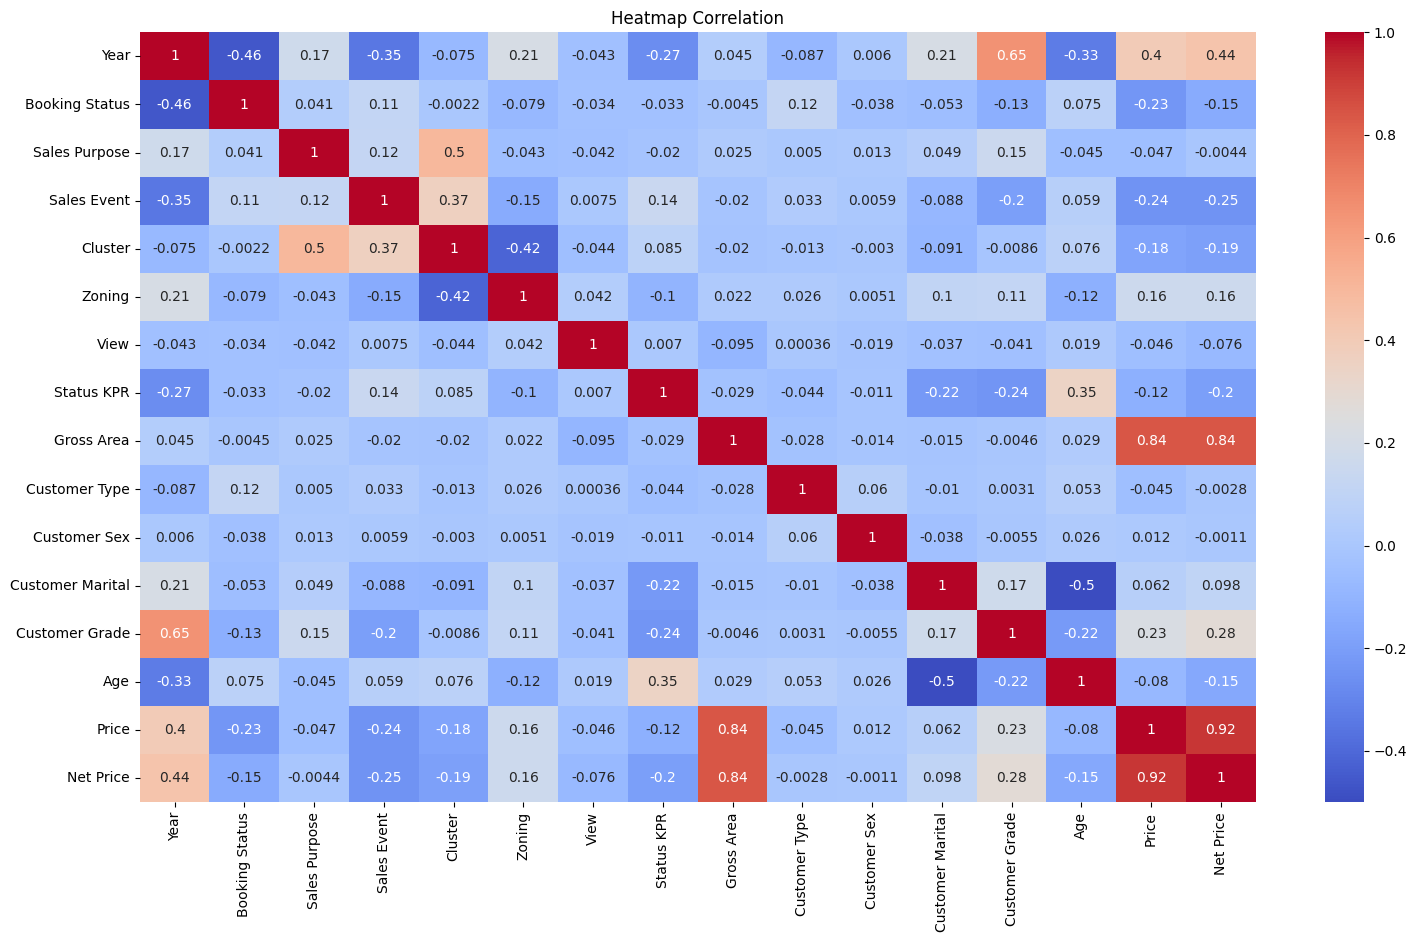

In [15]:
# Menampilkan peta panas korelasi untuk kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(18, 10))
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

In [50]:
# # --- 3. Split Data ---
# X = df[categorical_features + numerical_features]
# y = df['Sales Purpose']

In [16]:
# Memisahkan fitur dan Target
# Target: kolom 'Sales Purpose'
# Fitur: kolom 'cluster', 'customer grade', 'sales event', dan 'year'
# Kode berikut digunakan untuk menentukan fitur (variabel input) dan target (variabel output) yang akan digunakan dalam pemodelan machine learning.
# 'fitur' adalah daftar nama kolom yang dipilih sebagai fitur, yaitu 'Cluster', 'Customer Grade', 'Sales Event', dan 'Year'.
# X merupakan DataFrame yang berisi data dari kolom-kolom fitur tersebut.
# y adalah variabel target yang diambil dari kolom 'Sales Purpose' pada DataFrame df.

fitur = ['Sales Event', 'Cluster', 'Zoning', 'View', 'Status KPR', 'Customer Type', 'Customer Sex', 'Customer Marital', 'Customer Grade', 'Sales Event', 'Year']  # Mendefinisikan fitur yang akan digunakan
X = df[fitur]  # Mengambil data fitur dari DataFrame
y = df['Sales Purpose']  # Mengambil data target dari kolom 'Sales Purpose'


In [17]:
# Langkah 6: Data Balancing Menggunakan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


In [ ]:
# # Split train-test
# X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)


In [ ]:
# # --- 4. Pipeline Model & Hyperparameter Tuning ---
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# param_grid = {
#     'classifier__n_estimators': [100, 200],
#     'classifier__max_depth': [5, 10, 20, None],
#     'classifier__min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best Params:", grid_search.best_params_)
# print("Best CV Accuracy:", grid_search.best_score_)


In [18]:
# Langkah 7: Membagi Data Menjadi Set Pelatihan dan Pengujian dengan rasio 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [19]:
# Menampilkan ringkasan dari pembagian data setelah SMOTE
print("Dimensi X_train:", X_train.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_test:", y_test.shape)

print("Distribusi kelas pada y_train:")
print(y_train.value_counts())

print("Fitur yang digunakan:", X_train.columns)

Dimensi X_train: (1892, 11)
Dimensi y_train: (1892,)
Dimensi X_test: (474, 11)
Dimensi y_test: (474,)
Distribusi kelas pada y_train:
Sales Purpose
0    946
1    946
Name: count, dtype: int64
Fitur yang digunakan: Index(['Sales Event', 'Cluster', 'Zoning', 'View', 'Status KPR',
       'Customer Type', 'Customer Sex', 'Customer Marital', 'Customer Grade',
       'Sales Event', 'Year'],
      dtype='object')


In [20]:
# Menentukan parameter grid untuk RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Menentukan parameter grid untuk DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [21]:
# Inisialisasi RandomForestClassifier dan DecisionTreeClassifier
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)


In [22]:
# GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# GridSearchCV untuk Decision Tree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)



Fitting 3 folds for each of 216 candidates, totalling 648 fits


d:\Materi Ajar\Machine Learning Tutorial\venv\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [23]:
# Menampilkan hasil GridSearchCV terbaik untuk Random Forest dan Decision Tree
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best parameters for Decision Tree: ", grid_search_dt.best_params_)



Best parameters for Random Forest:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [24]:
# 3. Evaluasi Model
from sklearn.metrics import classification_report

# Prediksi menggunakan model terbaik
best_rf = grid_search_rf.best_estimator_
best_dt = grid_search_dt.best_estimator_

# Prediksi untuk Random Forest dan Decision Tree
y_pred_rf = best_rf.predict(X_test)
y_pred_dt = best_dt.predict(X_test)

# Classification report untuk Random Forest
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

# Classification report untuk Decision Tree
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       237
           1       0.79      0.88      0.83       237

    accuracy                           0.82       474
   macro avg       0.82      0.82      0.82       474
weighted avg       0.82      0.82      0.82       474


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       237
           1       0.81      0.86      0.83       237

    accuracy                           0.83       474
   macro avg       0.83      0.83      0.83       474
weighted avg       0.83      0.83      0.83       474



# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">4. Modelling</p>

In [25]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [26]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [27]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">5. Evaluation</p>

In [28]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [29]:
# Fungsi untuk plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [30]:
# Evaluasi dan visualisasi untuk setiap model
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model
}


Model: Decision Tree
Accuracy: 0.8080168776371308
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       237
           1       0.80      0.82      0.81       237

    accuracy                           0.81       474
   macro avg       0.81      0.81      0.81       474
weighted avg       0.81      0.81      0.81       474

Confusion Matrix:
 [[188  49]
 [ 42 195]]


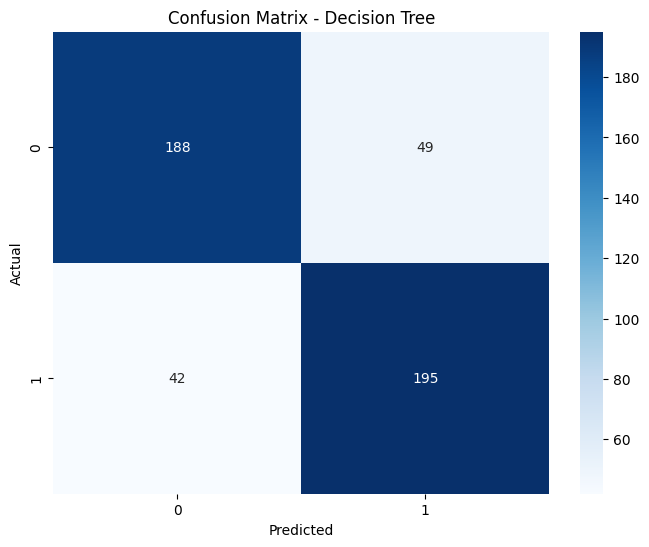

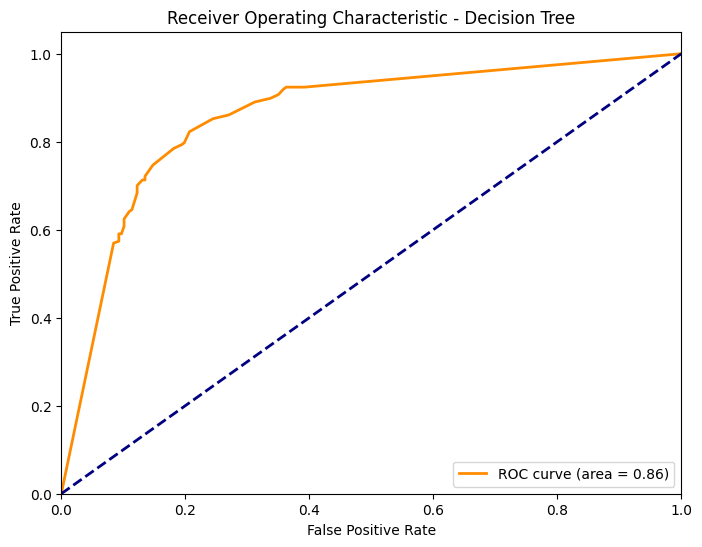


Model: Random Forest
Accuracy: 0.8037974683544303
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       237
           1       0.78      0.84      0.81       237

    accuracy                           0.80       474
   macro avg       0.81      0.80      0.80       474
weighted avg       0.81      0.80      0.80       474

Confusion Matrix:
 [[182  55]
 [ 38 199]]


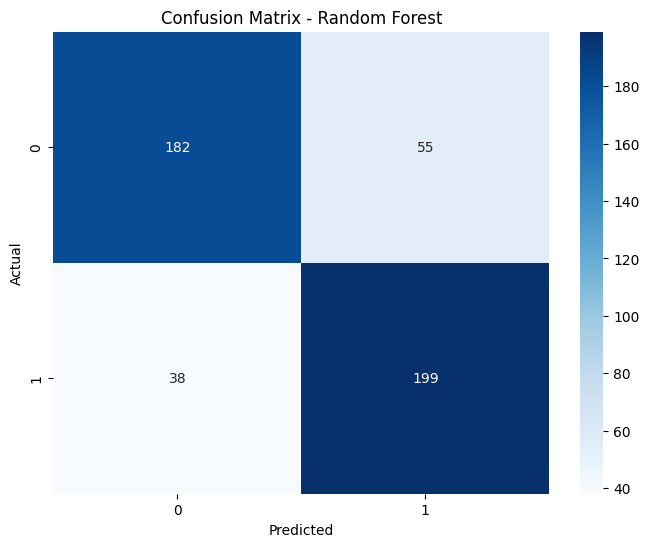

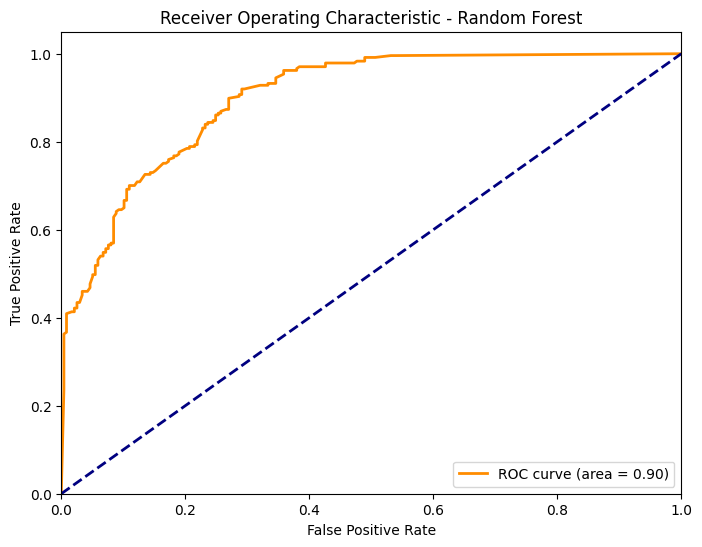


Model: Naive Bayes
Accuracy: 0.7025316455696202
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       237
           1       0.69      0.74      0.71       237

    accuracy                           0.70       474
   macro avg       0.70      0.70      0.70       474
weighted avg       0.70      0.70      0.70       474

Confusion Matrix:
 [[157  80]
 [ 61 176]]


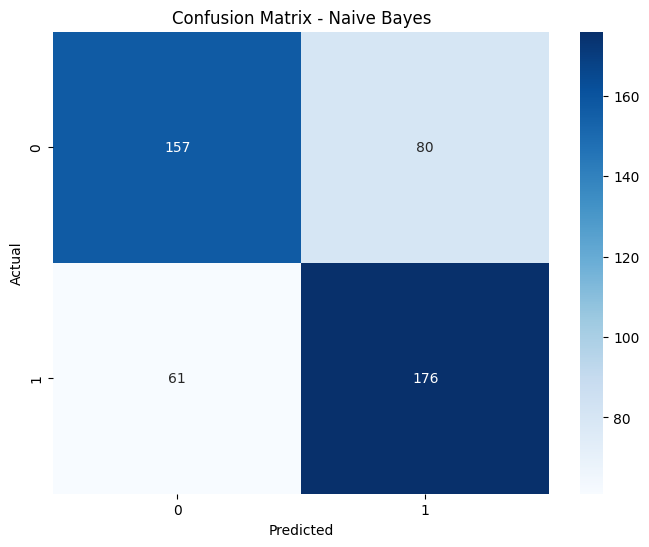

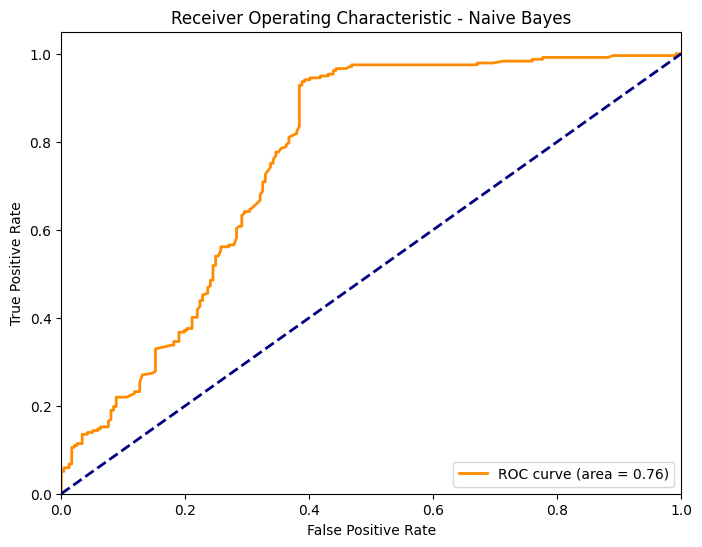

In [31]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    # Plot ROC curve if model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_pred_proba, model_name)
    # elif model_name == 'SVM':  # SVM with linear kernel uses decision_function
    #     y_pred_proba = model.decision_function(X_test)
    #     plot_roc_curve(y_test, y_pred_proba, model_name)

In [32]:
# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report_nb)
print("Naive Bayes Confusion Matrix:\n", confusion_matrix_nb)

Decision Tree Accuracy: 0.8080168776371308
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       237
           1       0.80      0.82      0.81       237

    accuracy                           0.81       474
   macro avg       0.81      0.81      0.81       474
weighted avg       0.81      0.81      0.81       474

Decision Tree Confusion Matrix:
 [[188  49]
 [ 42 195]]
Random Forest Accuracy: 0.8037974683544303
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       237
           1       0.78      0.84      0.81       237

    accuracy                           0.80       474
   macro avg       0.81      0.80      0.80       474
weighted avg       0.81      0.80      0.80       474

Random Forest Confusion Matrix:
 [[182  55]
 [ 38 199]]
Naive Bayes Accuracy: 0.7025316455696202
Naive Bayes Classification Repo

In [33]:
# Compile all results into a dictionary for easy comparison
model_performance = {
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Classification Report': classification_report_dt,
        'Confusion Matrix': confusion_matrix_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Classification Report': classification_report_rf,
        'Confusion Matrix': confusion_matrix_rf
    },
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Classification Report': classification_report_nb,
        'Confusion Matrix': confusion_matrix_nb
    }
}


# Display model performance
for model_name, performance in model_performance.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {performance['Accuracy']}")
    print("Classification Report:\n", performance['Classification Report'])
    print("Confusion Matrix:\n", performance['Confusion Matrix'])


Model: Decision Tree
Accuracy: 0.8080168776371308
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       237
           1       0.80      0.82      0.81       237

    accuracy                           0.81       474
   macro avg       0.81      0.81      0.81       474
weighted avg       0.81      0.81      0.81       474

Confusion Matrix:
 [[188  49]
 [ 42 195]]

Model: Random Forest
Accuracy: 0.8037974683544303
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       237
           1       0.78      0.84      0.81       237

    accuracy                           0.80       474
   macro avg       0.81      0.80      0.80       474
weighted avg       0.81      0.80      0.80       474

Confusion Matrix:
 [[182  55]
 [ 38 199]]

Model: Naive Bayes
Accuracy: 0.7025316455696202
Classification Report:
               precision    recall  f1-s

In [34]:
model_comp1 = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Naive Bayes'],
    'Accuracy': [accuracy_dt*100,accuracy_rf*100,accuracy_nb*100]
    })
model_comp1.head()

,Model,Accuracy
0,Decision Tree,80.801688
1,Random Forest,80.379747
2,Naive Bayes,70.253165


# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">6. Deployment</p>

In [33]:
df = df.to_excel('simpan_data.xlsx')

In [ ]:
import joblib

# Menyimpan model
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')

In [ ]:
# Memuat model
loaded_dt_model = joblib.load('decision_tree_model.pkl')
loaded_rf_model = joblib.load('random_forest_model.pkl')
loaded_nb_model = joblib.load('naive_bayes_model.pkl')

In [ ]:
# Data baru untuk prediksi (sesuaikan dengan data Anda)
new_data = X_test.iloc[0].to_frame().T  # Mengambil satu baris data sebagai contoh

# Prediksi menggunakan model yang telah dimuat
prediction_dt = loaded_dt_model.predict(new_data)
prediction_rf = loaded_rf_model.predict(new_data)
prediction_nb = loaded_nb_model.predict(new_data)

# Menampilkan hasil prediksi
print(f"Decision Tree Prediction: {'Positif' if prediction_dt[0] == 1 else 'Negatif'}")
print(f"Random Forest Prediction: {'Positif' if prediction_rf[0] == 1 else 'Negatif'}")
print(f"Naive Bayes Prediction: {'Positif' if prediction_nb[0] == 1 else 'Negatif'}")